In [2]:
########### Self-customized setting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn
import math
from numba import jit, float64

#%% Plot Tong's default setting
SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 3


In [10]:
df = []
for i in range(1, 51):
    df.append(pd.read_csv('./data/res/added_links_run'+str(i)+'.csv', index_col=0))

In [18]:
links_added = []
for i in range(len(df)):
    links_added.append(set(df[i]['position in x'].values))

126.4 10.12916580968048


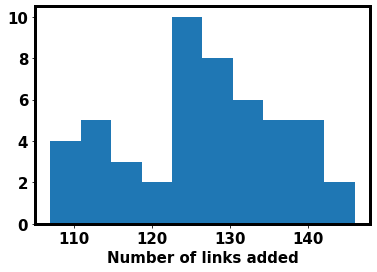

In [22]:
numLinksAdded = list(map(len, links_added))
plt.figure()
plt.hist(numLinksAdded);
plt.xlabel('Number of links added')
print(np.mean(numLinksAdded), np.std(numLinksAdded))

In [25]:
set.intersection(*links_added)

set()

In [36]:
#set.union(links_added[0], links_added[1])

#list(links_added[0]) + list(links_added[1])

from collections import Counter, OrderedDict
#Counter(links_added)

import functools 
prevOfLinks = Counter(functools.reduce(lambda a,b : list(a)+list(b), links_added))

In [48]:
#prevOfLinks.items()
from collections import OrderedDict
# prevOfLinksSorted = {k: v for k, v in OrderedDict(sorted(prevOfLinks.items(), key=lambda item: item[1], reverse=True)}
prevOfLinksSorted = OrderedDict(OrderedDict(sorted(prevOfLinks.items(), key=lambda item: item[1], reverse=True)))

#np.argsort(prevOfLinksSorted.values)



Text(0, 0.5, 'prevalence of added link')

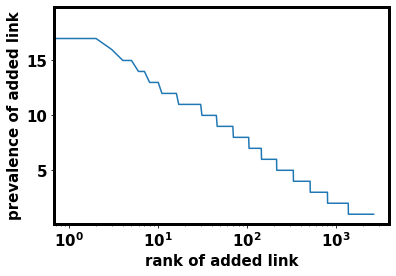

In [61]:
plt.plot(list(range(len(prevOfLinksSorted))), list(prevOfLinksSorted.values()))
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('rank of added link')
plt.ylabel('prevalence of added link')

Number of significant links and total links is:
70 2644
0.0264750378214826


/Users/tongwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  from ipykernel import kernelapp as app
/Users/tongwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


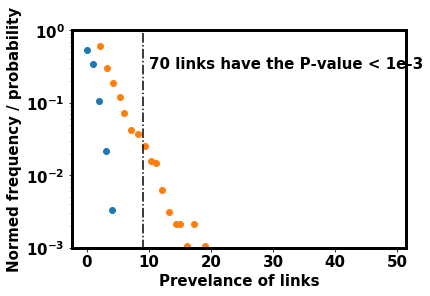

In [179]:
from scipy.stats import bernoulli, binom
NUMSIM = 50
xx = range(NUMSIM)
p = np.mean(numLinksAdded) / 10000
probCum = binom.cdf(xx, NUMSIM, p)
prob = binom.pmf(xx, NUMSIM, p)
threshold = np.where(probCum > 1 - 1e-8)[0][0]

numOfSigLinks = np.sum(np.array(list(prevOfLinksSorted.values())) >= threshold)
numOfTotalLinks = np.array(list(prevOfLinksSorted.values())).shape[0]
print('Number of significant links and total links is:')
print(numOfSigLinks, numOfTotalLinks)
print(numOfSigLinks / numOfTotalLinks)

ys_actual, xs_actual = np.histogram(list(prevOfLinksSorted.values()), bins=5, normed=True)

plt.plot(xx, prob, 'o')
ys_actual, xs_actual = np.histogram(list(prevOfLinksSorted.values()), bins=50, normed=True)
plt.plot(xs_actual[1:51], ys_actual, 'o')
plt.plot([threshold, threshold], [0, 1], 'k-.')
plt.yscale('log'); plt.ylim([1e-3, 1])
plt.xlabel('Prevelance of links')
plt.ylabel('Normed frequency / probability')
plt.text(threshold+1, 0.3, str(numOfSigLinks)+' links have the P-value < 1e-3');
#plt.text(threshold+1, 0.5, 'P-value < 1e-3')

In [180]:
pos_sig = list(prevOfLinksSorted.keys())[:numOfSigLinks]
#list(prevOfLinksSorted.values())[:numOfSigLinks]
len(pos_sig)
import pickle
pickle.dump(pos_sig, open('pos_sig_511_links.dat', 'wb'))

In [164]:
df_all = df[0].copy()
for i in range(1, 50):
    df_all = pd.concat([df_all, df[i]])
df_all.set_index('position in x', inplace=True)
df_all.loc[pos_sig]

,metabolite ID,metabolite names,microbes ID,microbes names,edgeType,error reduced,step added
position in x,,,,,,,
10394,2134,"L-Glutamine (D-Glutamine, Glutamine)",129,Bacteroides ovatus,3,0.002324,1056
10394,2179,"Niacin (Vitamin B3, Nicotinic acid, Nicotinate...",952,Roseburia intestinalis,3,0.003670,2531
10394,2229,Thymine,119,Bacteroides caccae,3,0.000659,2530
10394,2155,L-Tyrosine (Tyrosine),952,Roseburia intestinalis,3,0.002194,1519
10394,2122,Isovalerate (3-Methylbutanoic acid),456,Eubacterium limosum,3,0.011789,781
10394,2133,"L-Glutamate (L-Glutamic acid, Glutamate, D-Glu...",952,Roseburia intestinalis,3,0.004399,951
10394,2201,Propanoate (Propionate),161,Blautia hansenii (Ruminococcus hansenii),3,0.006507,2849
10394,2049,Cholic acid (Cholate),135,Bacteroides uniformis,3,0.004978,637
10394,2151,"L-Serine (Serine, D-Serine)",124,Bacteroides eggerthii,3,0.002842,1680


In [170]:
i=0
df[i][df[i] == 'position in x']

,metabolite ID,metabolite names,microbes ID,microbes names,edgeType,error reduced,step added,position in x
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
ys_actual, xs_actual = np.histogram(list(prevOfLinksSorted.values()), bins=5, normed=True)
print(xs_actual, ys_actual)

[ 1.   4.6  8.2 11.8 15.4 19. ] [0.24300303 0.02742057 0.00556816 0.00136578 0.00042024]


/Users/tongwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """Entry point for launching an IPython kernel.


In [139]:
numOfSigLinks = np.sum(np.array(list(prevOfLinksSorted.values())) >= threshold)
numOfTotalLinks = np.array(list(prevOfLinksSorted.values())).shape[0]
print(numOfSigLinks, numOfTotalLinks)
print(numOfSigLinks / numOfTotalLinks)

511 2644
0.193267776096823


In [ ]:



df_MAMBO = pd.read_csv("mambo_curated.txt", sep = '\t')
df_MAMBO_filtered_newID = df_MAMBO_filtered[['microbe_ID', 'metabolite_ID']].copy()
df_MAMBO_filtered_newID.columns = ['microbes', 'metabolites']
df_MAMBO_filtered_newID['microbes'] = df_microbes.loc[df_MAMBO_filtered_newID['microbes']].values
df_MAMBO_filtered_newID['metabolites'] = df_metabolites.loc[df_MAMBO_filtered_newID['metabolites']].values
s1 = df_MAMBO_filtered_newID
s2 = net[['metabolites', 'microbes']]
numOverlap = len(pd.merge(s1, s2, how='inner'))